# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load & Read the Data

In [ ]:
data = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\ML\Diabetes prediction using Binary Classification\diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().values.any()

False

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

# Visualizing the Data

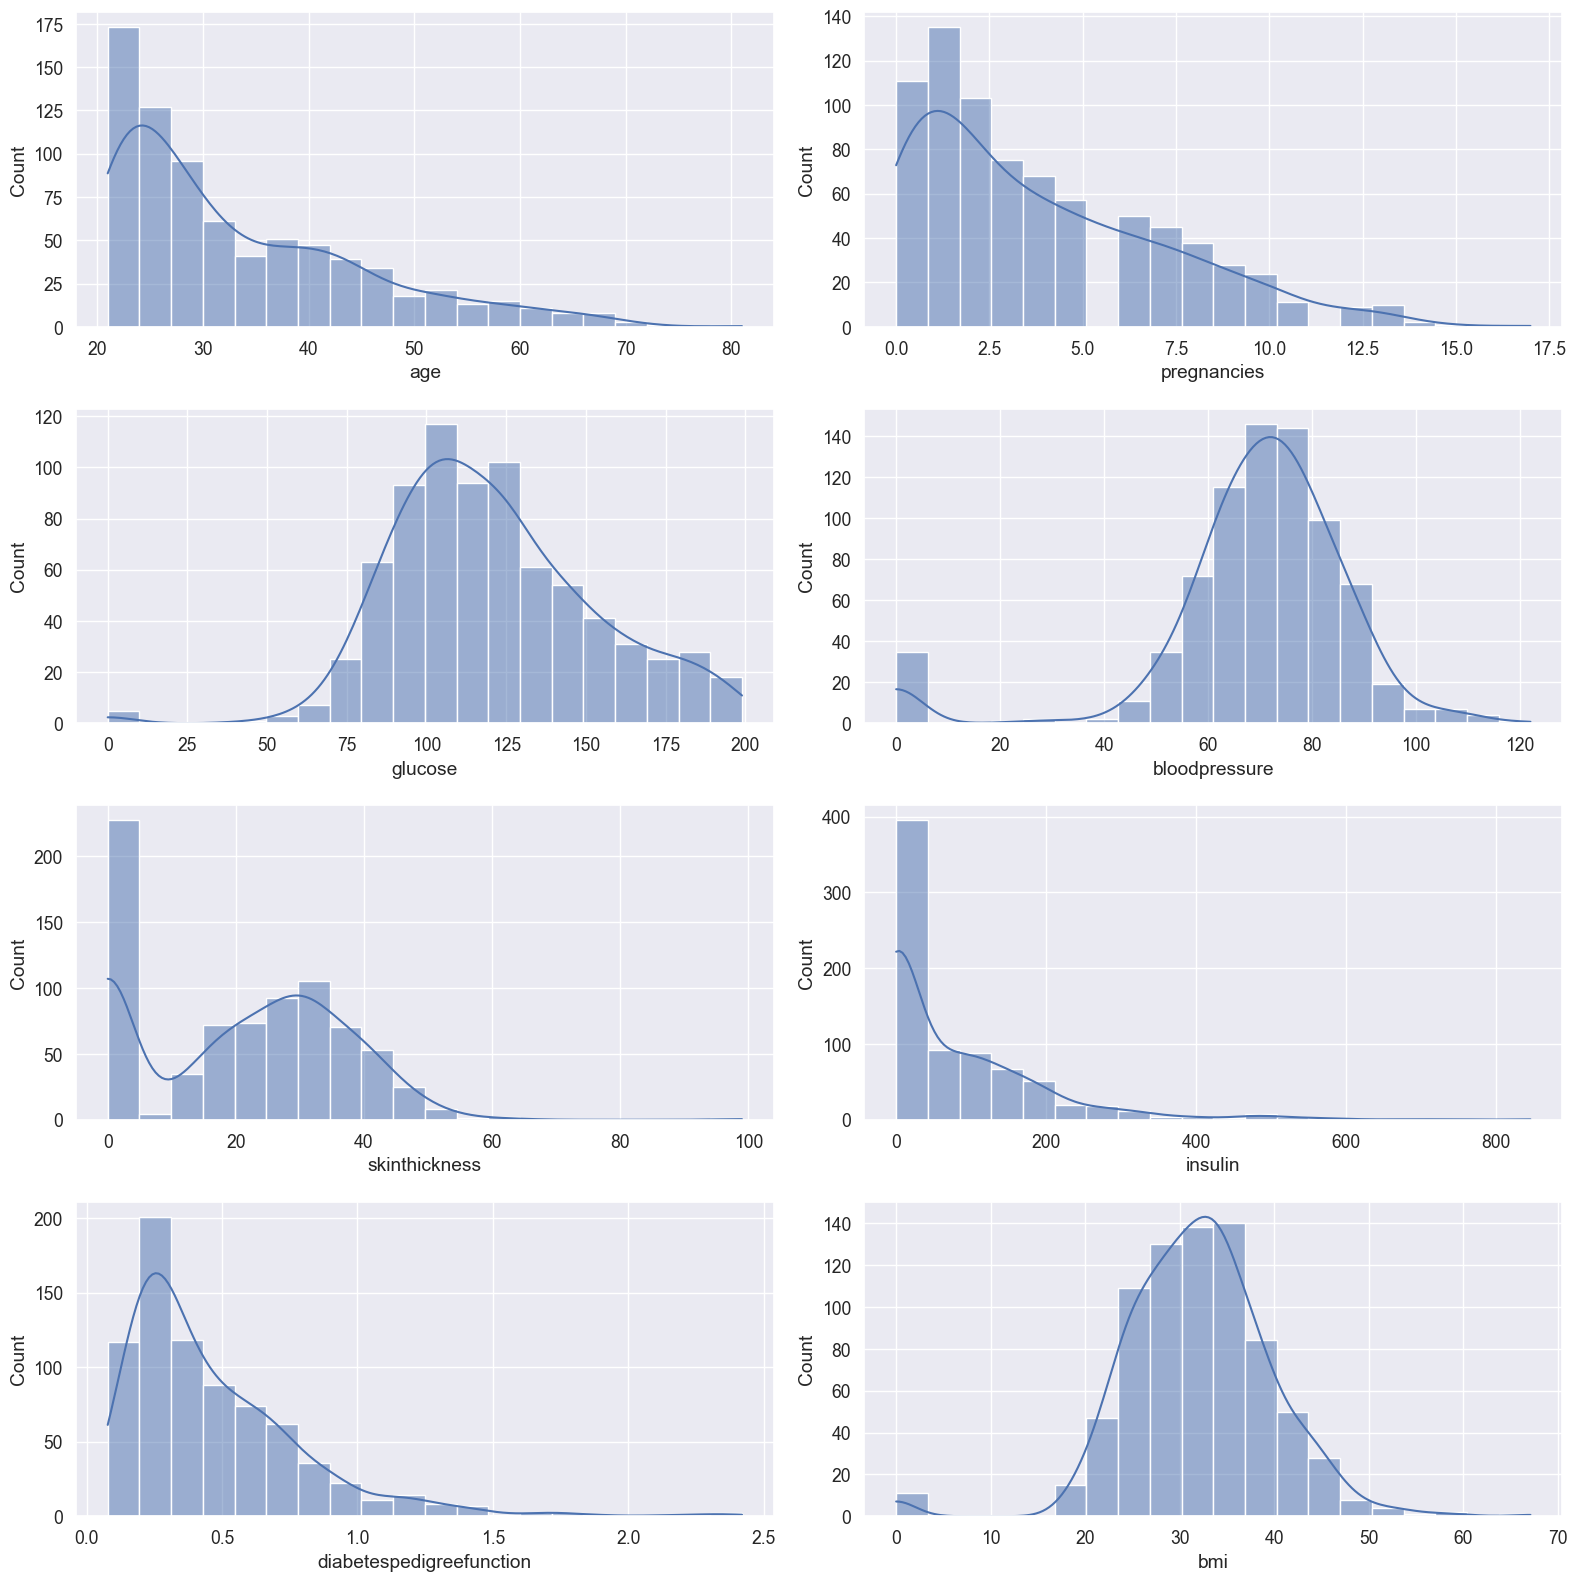

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

sns.histplot(data.age, bins=20, kde=True, ax=ax[0, 0])
sns.histplot(data.pregnancies, bins=20, kde=True, ax=ax[0, 1])
sns.histplot(data.glucose, bins=20, kde=True, ax=ax[1, 0])
sns.histplot(data.bloodpressure, bins=20, kde=True, ax=ax[1, 1])
sns.histplot(data.skinthickness, bins=20, kde=True, ax=ax[2, 0])
sns.histplot(data.insulin, bins=20, kde=True, ax=ax[2, 1])
sns.histplot(data.diabetespedigreefunction, bins=20, kde=True, ax=ax[3, 0])
sns.histplot(data.bmi, bins=20, kde=True, ax=ax[3, 1])

plt.tight_layout()
plt.show()

<Axes: xlabel='pregnancies', ylabel='glucose'>

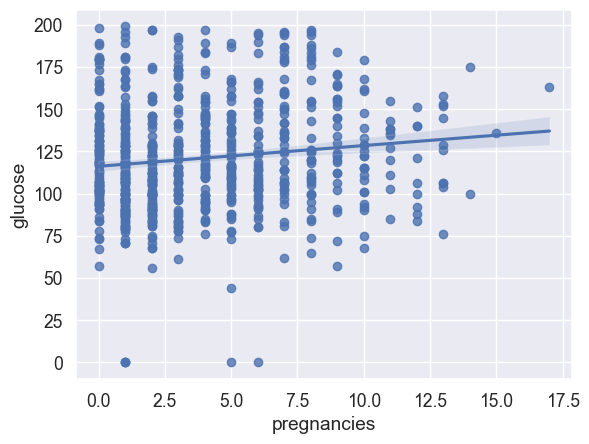

In [ ]:
sns.regplot(x = data.pregnancies, y = data.glucose)

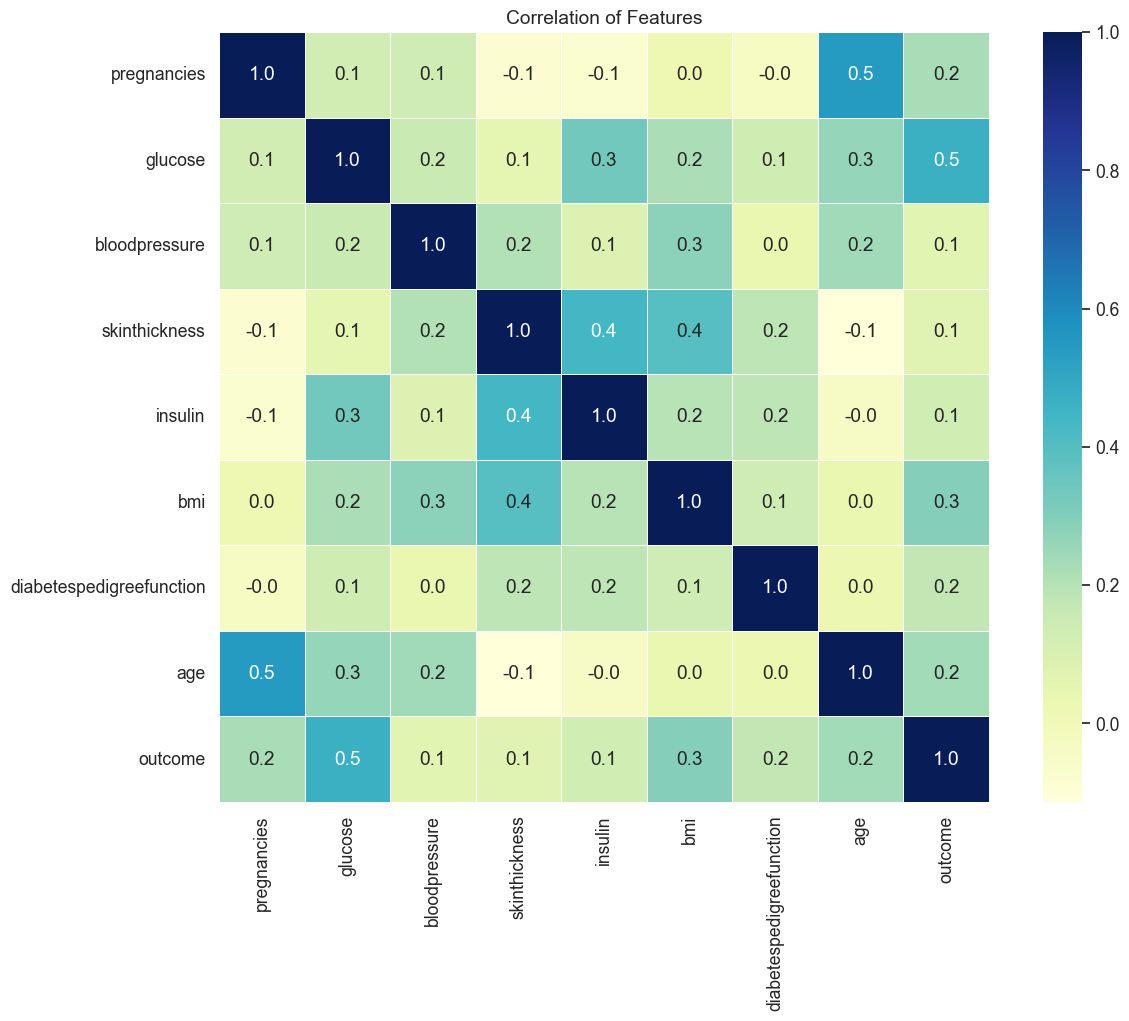

In [ ]:
sns.set_theme(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(data.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

# Normalization

In [ ]:
# Normalization Formula; (x - min(x))/max(x)-min(x)
y = data.outcome.values
x = data.drop(["outcome"], axis = 1)

x = (x - np.min(x.values)) / (np.max(x.values) - np.min(x.values))

# Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

features = x_train.T
labels = y_train.T
test_features = x_test.T
test_labels = y_test.T

print("features: ", features.shape)
print("labels: ", labels.shape)
print("test_features: ", test_features.shape)
print("test_labels: ", test_labels.shape)

features:  (8, 614)
labels:  (614,)
test_features:  (8, 154)
test_labels:  (154,)


# Defining the Functions

In [ ]:
#Parameter Initialize 
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1),0.01)
    b= 0.0
    return w,b

In [ ]:
# Sigmoid Function**
# Sigmoid Function Formula; 1/(1+e^-x)
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
# Forward & Backward Propagation
def foward_and_backward_propagation(w, b, x_train, y_train):
    #Forward Propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]          #x_train.shape[1] is for scaling
    
    # Backward Propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients

# Updating the Parameters

In [ ]:
#Updating Parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating (learning) parameters is number_of_iterations times
    for i in range(number_of_iterations):
        
        cost, gradients = foward_and_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        #Let's update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f" %(i, cost))
            
    # We update (learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.title("Cost-Iteration Relation")
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# Prediction

In [ ]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test)+b)
    y_prediction = np.zeros((1, x_test.shape[1]))
    #
    #
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
            
    return y_prediction

# Logistic Regression

Cost after iterations 0: 0.693601
Cost after iterations 10: 0.644783
Cost after iterations 20: 0.643093
Cost after iterations 30: 0.641511
Cost after iterations 40: 0.640023
Cost after iterations 50: 0.638617
Cost after iterations 60: 0.637285
Cost after iterations 70: 0.636018
Cost after iterations 80: 0.634809
Cost after iterations 90: 0.633652
Cost after iterations 100: 0.632541
Cost after iterations 110: 0.631471
Cost after iterations 120: 0.630438
Cost after iterations 130: 0.629438
Cost after iterations 140: 0.628468
Cost after iterations 150: 0.627524
Cost after iterations 160: 0.626604
Cost after iterations 170: 0.625706
Cost after iterations 180: 0.624828
Cost after iterations 190: 0.623967
Cost after iterations 200: 0.623124
Cost after iterations 210: 0.622295
Cost after iterations 220: 0.621480
Cost after iterations 230: 0.620679
Cost after iterations 240: 0.619889
Cost after iterations 250: 0.619111
Cost after iterations 260: 0.618343
Cost after iterations 270: 0.617585
Cos

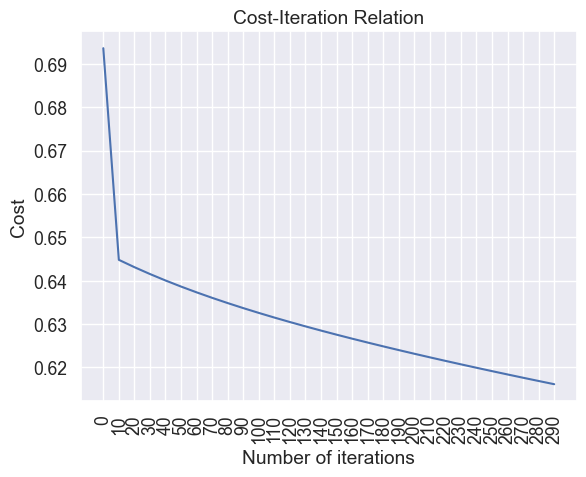

test accuracy: 65.58441558441558 %


In [ ]:
def logistic_regression(features, labels, test_features, test_labels, learning_rate ,  num_iterations):
    # Initialize
    dimension =  features.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, features, labels, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],test_features)
    # Print test errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - test_labels)) * 100))
    
logistic_regression(features, labels, test_features, test_labels,learning_rate = 1.5, num_iterations = 300)   